# Showcasing the different data types in the dataset

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openslide
from openslide import open_slide
from PIL import Image
import json

plt.style.use("seaborn-v0_8")

In [18]:
tma_num = 2
core_id = "B3"

## Tissue core metadata

In [36]:
# Finding the cancer type, the patient ID belonging to the chosen tissue core and also whether it has any recorded data
path = f"/home/borbende/multimodal_CRC_dataset/TMA{tma_num}/"
spectra_labels = pd.read_csv(f"{path}/TMA{tma_num}_core_metadata.csv")
spectra_labels.head(5)

,cores,cancer,patient,has_MIR,on_WSI
0,B1,NC,7183_09,yes,yes
1,B2,CRC,7183_09,yes,yes
2,B3,CRLM,4115_10,yes,yes
3,B4,NC,7531/09,no,yes
4,B5,CRC,7531/09,no,yes


In [37]:
spectra_labels[spectra_labels["cores"] == core_id]

,cores,cancer,patient,has_MIR,on_WSI
2,B3,CRLM,4115_10,yes,yes


## MIR spectroscopy

### Spectra

In [19]:
# Loading a chosen MIR measurement
path = f"/home/borbende/multimodal_CRC_dataset/TMA{tma_num}/MIR/"
mir = pd.read_csv(f'{path}/spectra/tma{tma_num}_{core_id}_res8_co16_2.2int_25.txt', index_col = 0)
mir

,X,Y,4000.0,3996.0,3992.0,3988.0,3984.0,3980.0,3976.0,3972.0,...,784.0,780.0,776.0,772.0,768.0,764.0,760.0,756.0,752.0,748.0
0,-1087.499957,1087.499957,96.811300,96.811910,96.710530,96.691380,96.760430,96.717890,96.510506,96.371050,...,98.878360,98.795680,98.918110,99.116860,99.221850,99.279305,99.262596,99.127510,99.014550,98.992140
1,-1062.499958,1087.499957,98.110980,98.063260,97.834390,97.633480,97.561300,97.573784,97.530106,97.484290,...,98.663880,98.603890,98.564730,98.679760,98.785080,98.673515,98.526146,98.518745,98.542190,98.532080
2,-1037.499959,1087.499957,98.100570,97.974815,97.980920,98.046260,97.936980,97.682940,97.535630,97.610100,...,98.599230,98.624240,98.751465,98.895460,99.024506,99.075980,99.107360,99.075370,98.903590,98.742860
3,-1012.499960,1087.499957,97.580925,97.681595,97.656240,97.600390,97.732605,97.785515,97.557304,97.426030,...,98.349960,98.269330,98.372440,98.499870,98.548010,98.548930,98.598650,98.655716,98.608444,98.491600
4,-987.499961,1087.499957,97.703040,97.811560,97.824165,97.762450,97.709240,97.618400,97.411950,97.252370,...,98.828630,99.000470,98.973236,98.808784,98.723050,98.813700,98.966730,99.021904,99.011740,98.960290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,987.499961,-1087.499957,98.788055,98.547860,98.297970,98.352090,98.561370,98.531296,98.379944,98.333960,...,99.258156,99.325060,99.358780,99.430720,99.511300,99.544655,99.479065,99.393410,99.453160,99.589900
7740,1012.499960,-1087.499957,98.196350,98.109760,97.902800,97.776215,97.829610,97.949440,98.000290,98.004486,...,99.537250,99.428360,99.411530,99.515980,99.527890,99.466650,99.491974,99.598015,99.568960,99.440550
7741,1037.499959,-1087.499957,97.143940,97.142580,97.025150,96.934680,96.916855,96.853620,96.729390,96.732940,...,99.549866,99.544044,99.588200,99.729210,99.851010,99.829380,99.683150,99.554070,99.576850,99.645004
7742,1062.499958,-1087.499957,98.771034,98.578320,98.447490,98.413690,98.423220,98.306930,98.181694,98.214740,...,99.482414,99.499504,99.556080,99.582000,99.506790,99.312360,99.268850,99.496010,99.653460,99.524340


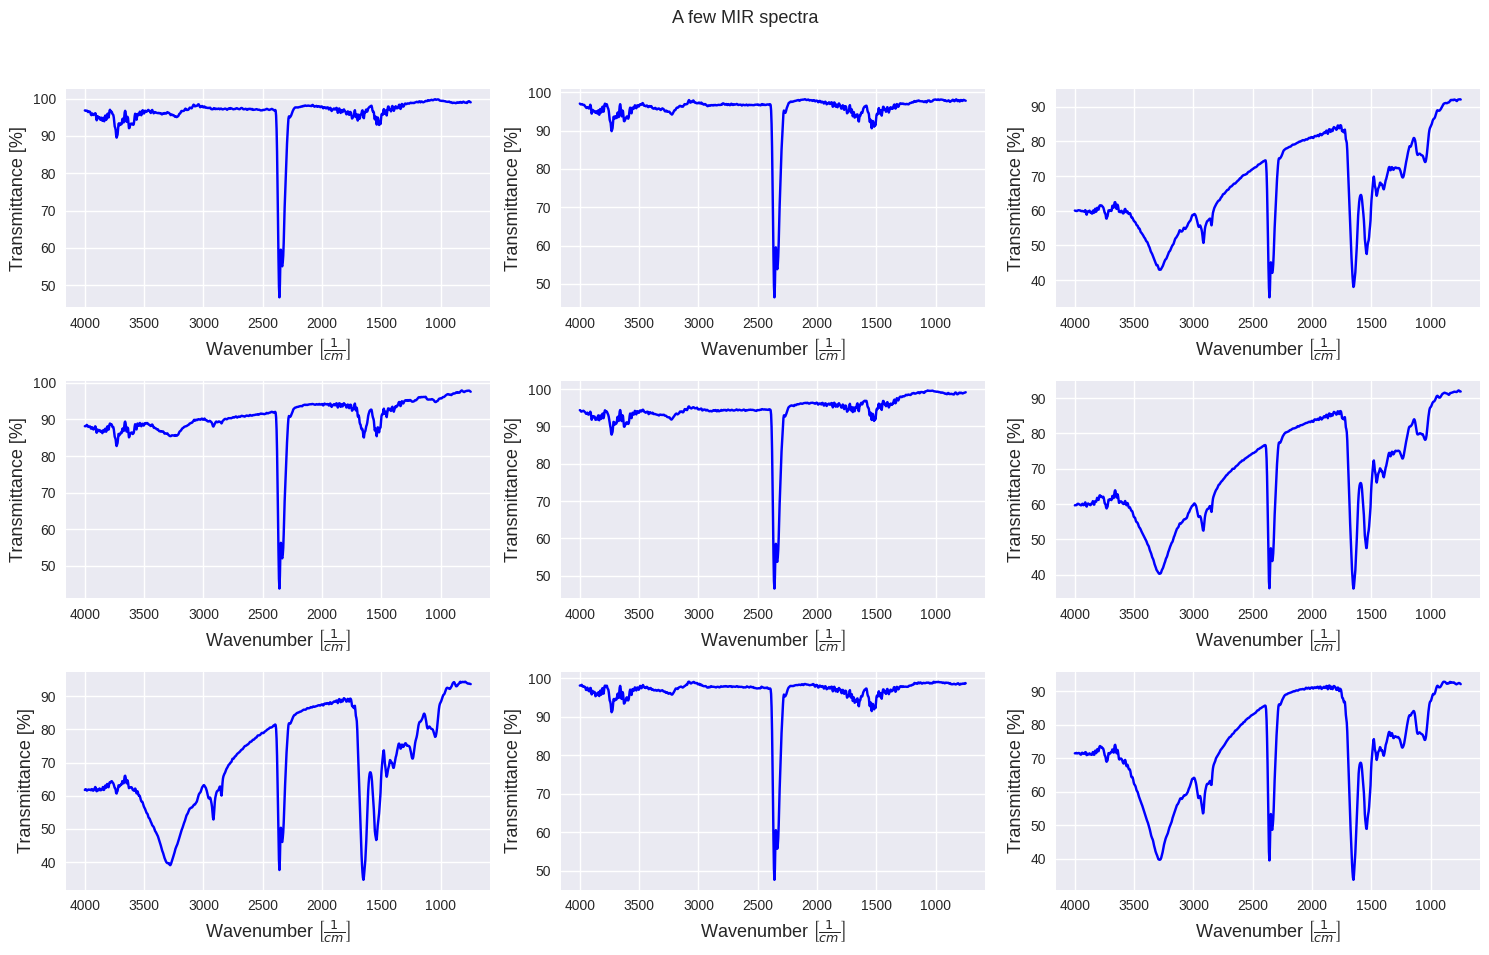

In [20]:
plt.figure(figsize = (15, 10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.plot(mir.columns.values[2:].astype(np.float64), mir.iloc[i*200,2:], color = "b")
    plt.xlabel(r"Wavenumber $\left[\frac{1}{cm}\right]$", fontsize = 13)
    plt.ylabel("Transmittance [%]", fontsize = 13)
    plt.gca().invert_xaxis()
    
plt.suptitle("A few MIR spectra", fontsize = 13)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [21]:
mir.isna().sum().sum()

0

### Measurement metadata

In [25]:
with open(f"{path}/metadata/tma{tma_num}_{core_id}_res8_co16_2.2int_25.json") as f:
    d = json.load(f)
d

{'signature': 'PEPE',
 'description': 'DataSet - 4DConst3DInterval\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'name': 'tma2_B3_res8_co16_2.2int_25',
 'x_delta': 24.99999900658929,
 'y_delta': 24.99999900658929,
 'z_delta': -4.0,
 'z_start': 4000.0,
 'z_end': 748.0,
 'z_4d_start': 0.0,
 'z_4d_end': 0.0,
 'x_init': -1087.4999567866341,
 'y_init': -1087.4999567866341,
 'z_init': 4000.0,
 'n_x': 88,
 'n_y': 88,
 'n_z': 814,
 'text1': 89,
 'text2': 32,
 'resolution': 26989,
 'text3': 99,
 'transmission': 28530,
 'text4': 109,
 'analyst': 'administrator',
 'date': 'Tue Nov 28 13:45:13 2023',
 'image_name': '',
 'instrument_model': 'Spotlight/Spectrum 400',
 'instrument_serial_number': '/80837',
 'instrument_software_version': '00.01.0060/00.03.3299',
 'accumulations': 16,
 'detector': 'MCT Array ',
 'source': 'MIR',
 'beam_splitter': 'OptKBr',
 'apodization': 'Filler',
 'spectrum_type': 'Ratio (%R)',
 'beam_type': 'Sample',
 'phase_correction': 'Magnitude',
 'ir_accessory': 'Spot

### Visible image of the measurement area created by the microscope

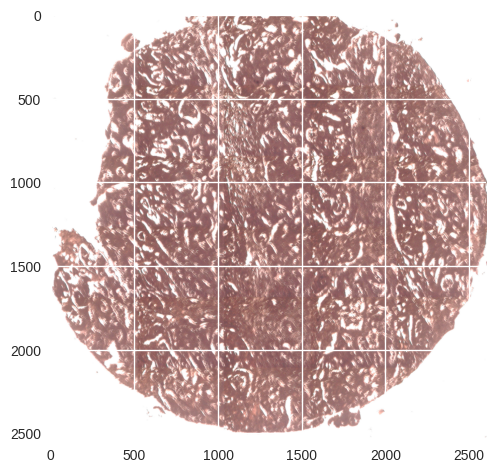

In [26]:
vis = plt.imread('tma2_B3_cut.bmp')
plt.imshow(vis)
plt.show()

## Whole Slide Image (WSI)

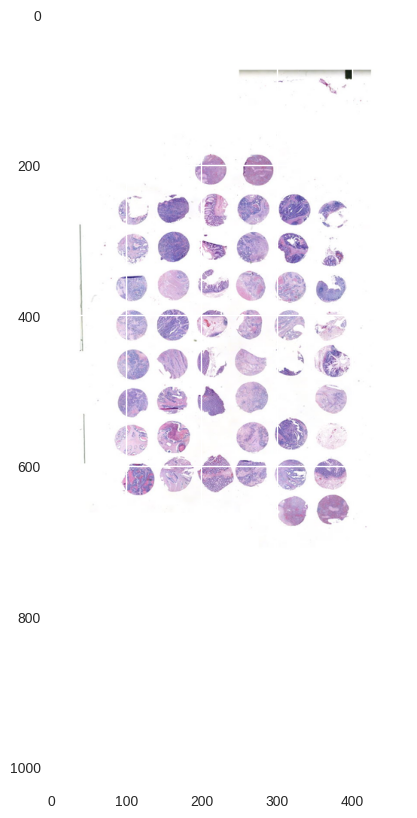

In [34]:
path = f"/home/borbende/multimodal_CRC_dataset/TMA{tma_num}/WSI/"
slide = open_slide(f"{path}24_TMA{tma_num}_PA.mrxs")
thumbnail = slide.get_thumbnail((1024, 1024))  # Downsample for quick viewing

plt.figure(figsize = (15, 10))
plt.imshow(thumbnail)
plt.show()

In [38]:
print("Dimensions:", slide.dimensions)
slide_props = slide.properties
print("X micrometer per pixel", float(slide_props['openslide.mpp-x']))
print("Y micrometer per pixel", float(slide_props['openslide.mpp-y']))
print("Objective power:", slide_props.get("openslide.objective-power"))
print("Vendor:", slide_props.get("openslide.vendor"))

Dimensions: (105472, 227840)
X micrometer per pixel 0.242534722222222
Y micrometer per pixel 0.242647058823529
Objective power: 20
Vendor: mirax


## Figure for the manuscript

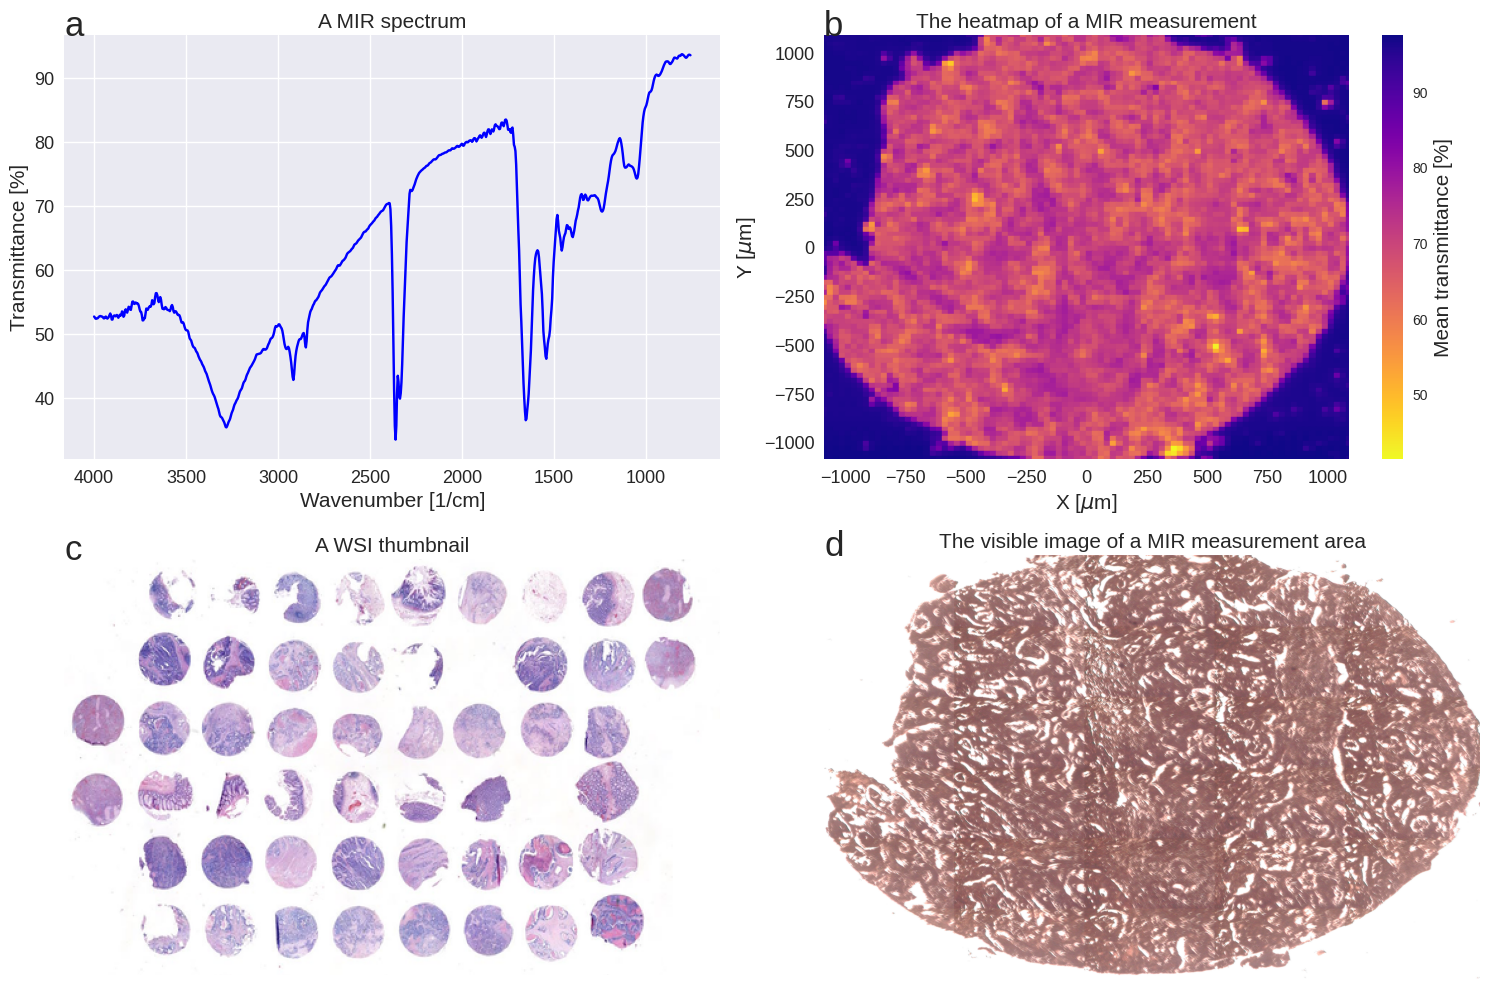

In [35]:
plt.figure(figsize = (15, 10))


plt.subplot(2,2,1)
plt.plot(mir.columns.values[2:-2].astype(np.float64), mir.iloc[500,2:-2], color = "b")
plt.xlabel(r"Wavenumber [1/cm]", fontsize = 15)
plt.ylabel("Transmittance [%]", fontsize = 15)
plt.title("A MIR spectrum", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.gca().invert_xaxis()

plt.text(0.0001, 0.9999, "a", transform=plt.gca().transAxes, fontsize=25)

plt.subplot(2,2,2)
plt.scatter(mir['X'], mir['Y'], c = mir.iloc[:,2:-2].mean(axis = 1), cmap = 'plasma_r', s = 20, marker = 's')
plt.colorbar().set_label(label = 'Mean transmittance [%]', size = 15)
plt.xlim(mir['X'].min(axis = 0) - 0.05, mir['X'].max(axis = 0) + 0.05)
plt.ylim(mir['Y'].min(axis = 0) - 0.05, mir['Y'].max(axis = 0) + 0.05)
plt.xlabel(r"X [$\mu$m]", fontsize = 15)
plt.ylabel(r"Y [$\mu$m]", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title(f"The heatmap of a MIR measurement", fontsize = 15)
plt.grid()

plt.text(0.0001, 0.9999, "b", transform=plt.gca().transAxes, fontsize=25)


plt.subplot(2,2,3)
plt.imshow(np.rot90(thumbnail))
plt.title("A WSI thumbnail", fontsize = 15)
plt.ylim(400, 70)
plt.xlim(180, 700)
plt.grid()
plt.axis("off")

plt.text(0.0001, 0.9999, "c", transform=plt.gca().transAxes, fontsize=25)

plt.subplot(2,2,4)
plt.imshow(vis)
plt.gca().set_aspect('auto')   # Fixis plt.imshow's different aspect ratio.
plt.title("The visible image of a MIR measurement area", fontsize = 15)
plt.grid()
plt.axis("off")

plt.text(0.0001, 0.9999, "d", transform=plt.gca().transAxes, fontsize=25)

plt.tight_layout()
#plt.savefig("data_examples.pdf")
plt.show()